In [1]:
import pandas as pd
import numpy as np

In [2]:
commits = pd.read_csv('commits.csv', parse_dates=True, encoding='UTF-8')
commits.head()

,key,cid,author_name,author_email,committer_name,committer_email,time,time_offset,tree_id,message_encoding
0,SPARK-16904,57626a55703a189e03148398f67c36cd0e557044,gatorsmile,gatorsmile@gmail.com,Reynold Xin,rxin@databricks.com,1478510197,-480,0f4ae99e29245041cae4d41f58aa208dba6beea4,[SPARK-16904][SQL] Removal of Hive Built-in Ha...
1,SPARK-18296,9db06c442cf85e41d51c7b167817f4e7971bf0da,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,1478501095,-480,e6325a24125325611506a7fc0119209b88be17e3,[SPARK-18296][SQL] Use consistent naming for e...
2,SPARK-18167,07ac3f09daf2b28436bc69f76badd1e36d756e4d,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,1478500925,-480,525bd0fd99741a6a0e2bcfdd5c4e074f839b92a5,[SPARK-18167][SQL] Disable flaky hive partitio...
3,SPARK-18173,46b2e499935386e28899d860110a6ab16c107c0c,Wenchen Fan,wenchen@databricks.com,Reynold Xin,rxin@databricks.com,1478487433,-480,a27367a0be38e5a8814aac6295387f0457c603c8,[SPARK-18173][SQL] data source tables should s...
4,SPARK-18269,556a3b7d07f36c29ceb88fb6c24cc229e0e53ee4,hyukjinkwon,gurwls223@gmail.com,Reynold Xin,rxin@databricks.com,1478487125,-480,ba48a84dc34757cd6691b6a7ce9abdb615c4c1ac,[SPARK-18269][SQL] CSV datasource should read ...


In [3]:
issues = pd.read_csv('issues.csv', parse_dates=True, encoding='UTF-8')
issues.head()

,key,jira_id,status_category,creator,priority,status,assignee,issuetype,reporter,resolution,project,updated,created,resolved,components,severity
0,SPARK-4957,12763687,Complete,nathan_gs,Major,Closed,None,Improvement,nathan_gs,None,Spark,2016-09-06T01:43:57.000+0000,2014-12-24T13:38:57.000+0000,2016-09-06T01:43:56.000+0000,Scheduler,3
1,SPARK-4956,12763679,Complete,liaoyuxi,Minor,Closed,None,Bug,liaoyuxi,None,Spark,2015-03-04T05:16:07.000+0000,2014-12-24T12:27:12.000+0000,2015-02-23T22:34:41.000+0000,MLlib,1
2,SPARK-4955,12763661,Complete,chengxiang li,Blocker,Closed,lianhuiwang,Bug,chengxiang li,None,Spark,2015-01-28T20:54:23.000+0000,2014-12-24T09:16:23.000+0000,2015-01-28T20:54:23.000+0000,YARN,10
3,SPARK-4954,12763657,Complete,liyezhang556520,Minor,Resolved,liyezhang556520,Improvement,liyezhang556520,None,Spark,2014-12-27T07:25:26.000+0000,2014-12-24T09:01:34.000+0000,2014-12-27T07:25:26.000+0000,Spark Core,1
4,SPARK-4953,12763643,Complete,sarutak,Major,Resolved,sarutak,Bug,sarutak,None,Spark,2014-12-25T15:06:12.000+0000,2014-12-24T07:07:56.000+0000,2014-12-25T15:06:12.000+0000,Documentation,3


In [4]:
data_frame = pd.merge(commits,issues,how='inner',on='key')
data_frame.head()

,key,cid,author_name,author_email,committer_name,committer_email,time,time_offset,tree_id,message_encoding,...,assignee,issuetype,reporter,resolution,project,updated,created,resolved,components,severity
0,SPARK-16904,57626a55703a189e03148398f67c36cd0e557044,gatorsmile,gatorsmile@gmail.com,Reynold Xin,rxin@databricks.com,1478510197,-480,0f4ae99e29245041cae4d41f58aa208dba6beea4,[SPARK-16904][SQL] Removal of Hive Built-in Ha...,...,smilegator,Sub-task,smilegator,None,Spark,2016-11-07T09:16:05.000+0000,2016-08-04T21:54:17.000+0000,2016-11-07T09:16:03.000+0000,SQL,3
1,SPARK-18296,9db06c442cf85e41d51c7b167817f4e7971bf0da,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,1478501095,-480,e6325a24125325611506a7fc0119209b88be17e3,[SPARK-18296][SQL] Use consistent naming for e...,...,rxin,Improvement,rxin,None,Spark,2016-11-07T06:44:05.000+0000,2016-11-07T03:12:26.000+0000,2016-11-07T06:44:05.000+0000,SQL,3
2,SPARK-18167,07ac3f09daf2b28436bc69f76badd1e36d756e4d,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,1478500925,-480,525bd0fd99741a6a0e2bcfdd5c4e074f839b92a5,[SPARK-18167][SQL] Disable flaky hive partitio...,...,None,Bug,ekhliang,None,Spark,2016-11-07T06:42:41.000+0000,2016-10-28T22:42:44.000+0000,NaN,SQL,3
3,SPARK-18167,4cee2ce251110218e68c0f8f30363ec2f2498bea,Eric Liang,ekl@databricks.com,Yin Huai,yhuai@databricks.com,1478300068,-420,b1af6b5308cffbc0b74e0c5020d762b156977629,[SPARK-18167] Re-enable the non-flaky parts of...,...,None,Bug,ekhliang,None,Spark,2016-11-07T06:42:41.000+0000,2016-10-28T22:42:44.000+0000,NaN,SQL,3
4,SPARK-18167,cfac17ee1cec414663b957228e469869eb7673c1,Eric Liang,ekl@databricks.com,Reynold Xin,rxin@databricks.com,1478028934,-420,1e466a61f21d984c6393826c3705400df9cb51dc,[SPARK-18167] Disable flaky SQLQuerySuite test...,...,None,Bug,ekhliang,None,Spark,2016-11-07T06:42:41.000+0000,2016-10-28T22:42:44.000+0000,NaN,SQL,3


In [5]:
import pandas_profiling as pf

In [6]:
columns = ['author_name','author_email','committer_name','committer_email','time','time_offset','message_encoding','severity']

In [7]:
data = data_frame[columns]
data.head()

,author_name,author_email,committer_name,committer_email,time,time_offset,message_encoding,severity
0,gatorsmile,gatorsmile@gmail.com,Reynold Xin,rxin@databricks.com,1478510197,-480,[SPARK-16904][SQL] Removal of Hive Built-in Ha...,3
1,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,1478501095,-480,[SPARK-18296][SQL] Use consistent naming for e...,3
2,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,1478500925,-480,[SPARK-18167][SQL] Disable flaky hive partitio...,3
3,Eric Liang,ekl@databricks.com,Yin Huai,yhuai@databricks.com,1478300068,-420,[SPARK-18167] Re-enable the non-flaky parts of...,3
4,Eric Liang,ekl@databricks.com,Reynold Xin,rxin@databricks.com,1478028934,-420,[SPARK-18167] Disable flaky SQLQuerySuite test...,3


In [8]:
pf.ProfileReport(data)

Number of variables,8
Number of observations,11475
Total Missing (%),0.0%
Total size in memory,806.8 KiB
Average record size in memory,72.0 B
Numeric,3
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Since we do not have missing data so do not need to replace anything

In [9]:
data['time'] = np.log(data.time)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
data.head()

,author_name,author_email,committer_name,committer_email,time,time_offset,message_encoding,severity
0,gatorsmile,gatorsmile@gmail.com,Reynold Xin,rxin@databricks.com,21.114301,-480,[SPARK-16904][SQL] Removal of Hive Built-in Ha...,3
1,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,21.114295,-480,[SPARK-18296][SQL] Use consistent naming for e...,3
2,Reynold Xin,rxin@databricks.com,Reynold Xin,rxin@databricks.com,21.114295,-480,[SPARK-18167][SQL] Disable flaky hive partitio...,3
3,Eric Liang,ekl@databricks.com,Yin Huai,yhuai@databricks.com,21.114159,-420,[SPARK-18167] Re-enable the non-flaky parts of...,3
4,Eric Liang,ekl@databricks.com,Reynold Xin,rxin@databricks.com,21.113975,-420,[SPARK-18167] Disable flaky SQLQuerySuite test...,3


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['author_name','author_email','committer_name','committer_email']
for item in columns:
    data[item] = le.fit_transform(data[item])
data.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,author_name,author_email,committer_name,committer_email,time,time_offset,message_encoding,severity
0,830,303,42,58,21.114301,-480,[SPARK-16904][SQL] Removal of Hive Built-in Ha...,3
1,566,787,42,58,21.114295,-480,[SPARK-18296][SQL] Use consistent naming for e...,3
2,566,787,42,58,21.114295,-480,[SPARK-18167][SQL] Disable flaky hive partitio...,3
3,201,260,54,80,21.114159,-420,[SPARK-18167] Re-enable the non-flaky parts of...,3
4,201,260,42,58,21.113975,-420,[SPARK-18167] Disable flaky SQLQuerySuite test...,3


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern= r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=50000)

text_message = data['message_encoding']
word_vectorizer.fit(text_message)
word_features = word_vectorizer.transform(text_message)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = word_features
y = data['severity']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear  Model

In [18]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(n_jobs = -1)
sgd.fit(X_train,y_train)
score = sgd.score(X_test,y_test)
print("Test score: {0}".format(score))

Test score: 0.5912854030501089


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1)
rf.fit(X_train,y_train)
score = rf.score(X_test,y_test)
print("Test score: {0}".format(score))

Test score: 0.5620915032679739


### DecisionTree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)
score = dtr.score(X_test,y_test)
print("Test score: {0}".format(score))

Test score: 0.49760348583877995


### SVM

In [21]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)
score = svc.score(X_test,y_test)
print("Test score: {0}".format(score))

Test score: 0.5464052287581699


### Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold,  GridSearchCV
jobs = 4
def grid_search(estimator, param, X, y):
    skf = StratifiedKFold(n_splits = 3)
    grid = GridSearchCV(estimator = estimator,
                    param_grid = param,
                       # scoring='roc_auc',
                   n_jobs= jobs,
                       cv = skf)
    grid.fit(X,y)
    return grid.best_score_,grid.best_estimator_

In [35]:
param_svm = {
    'C':[0.01, 0.05, 0.1, 0.5, 1.0],
    'kernel':['linear', 'poly', 'rbf']
}

score, svc_ = grid_search(svc,param_svm,X,y)
print("Score: {0}".format(score))

Score: 0.5620915032679739


In [34]:
param_rf = {
    'n_estimators' : [10,16,32,64,100],
    'max_depth' : [8,12,14,20,None],
    'min_samples_split' : [2,4,6,8,10],
    'min_samples_leaf' : [1,2,4,8],
    'class_weight' : ['balanced'] 
}
score, rf_ = grid_search(rf,param_rf,X,y)
print("Score: {0}".format(score))

Score: 0.5471895424836601


In [24]:
param_sgd = {
    'penalty': ['l1','l2'],
    'alpha': [0.0001,0.001,0.005,0.01]
}
score,sgd_ = grid_search(sgd,param_sgd,X,y)
print("Score: {0}".format(score))

Score: 0.556165577342048


In [39]:
param_dtr = {
    'max_depth' : [8,12,14,20,None],
    'min_samples_split' : [2,4,6,8,10],
    'min_samples_leaf' : [1,2,4,8],
    'class_weight': ['balanced']
}
score, dtr_ = grid_search(dtr,param_dtr,X,y)
print("Score: {0}".format(score))

Score: 0.3672331154684096


#### On cross validation SVM was better with score 0.562.   

### Confusion matrix

Confusion matrix, without normalization
[[   0    6  108    0    0]
 [   0   26  519    0    0]
 [   0    4 1250    0    0]
 [   0    2  179    1    0]
 [   0    1  197    0    2]]
Normalized confusion matrix
[[0.   0.05 0.95 0.   0.  ]
 [0.   0.05 0.95 0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.01 0.98 0.01 0.  ]
 [0.   0.01 0.98 0.   0.01]]


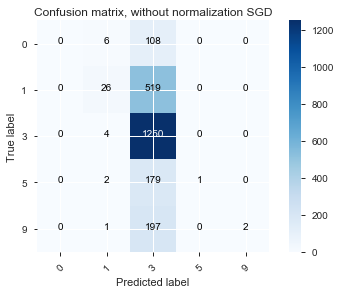

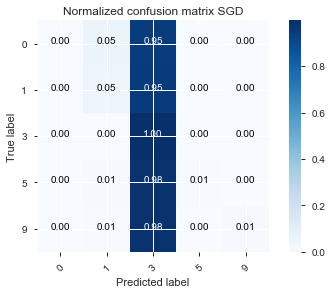

In [43]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
class_names=['0','1','3','5','9']
# Compute confusion matrix
cnf_matrix_sgd = confusion_matrix(y_test, sgd_.predict(X_test))
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_sgd, classes=class_names,
                      title='Confusion matrix, without normalization SGD')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_sgd, classes=class_names, normalize=True,
                      title='Normalized confusion matrix SGD')
plt.show()



Confusion matrix, without normalization
[[ 114    0    0    0    0]
 [   5  522   13    2    3]
 [   1   28 1178   21   26]
 [   1    0    1  177    3]
 [   1    1    1    4  193]]
Normalized confusion matrix
[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [9.17e-03 9.58e-01 2.39e-02 3.67e-03 5.50e-03]
 [7.97e-04 2.23e-02 9.39e-01 1.67e-02 2.07e-02]
 [5.49e-03 0.00e+00 5.49e-03 9.73e-01 1.65e-02]
 [5.00e-03 5.00e-03 5.00e-03 2.00e-02 9.65e-01]]


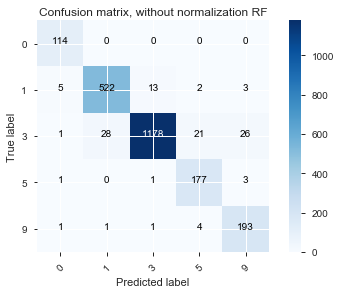

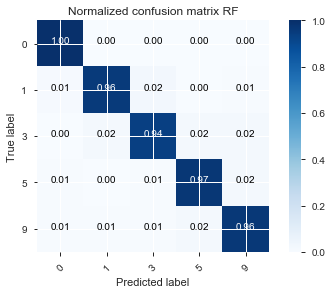

In [44]:
# Compute confusion matrix
cnf_matrix_rf = confusion_matrix(y_test, rf_.predict(X_test))
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_rf, classes=class_names,
                      title='Confusion matrix, without normalization RF')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_rf, classes=class_names, normalize=True,
                      title='Normalized confusion matrix RF')
plt.show()


Confusion matrix, without normalization
[[   5   40   69    0    0]
 [   0  273  271    0    1]
 [   0   30 1224    0    0]
 [   0    5  176    0    1]
 [   0    4  178    0   18]]
Normalized confusion matrix
[[0.04 0.35 0.61 0.   0.  ]
 [0.   0.5  0.5  0.   0.  ]
 [0.   0.02 0.98 0.   0.  ]
 [0.   0.03 0.97 0.   0.01]
 [0.   0.02 0.89 0.   0.09]]


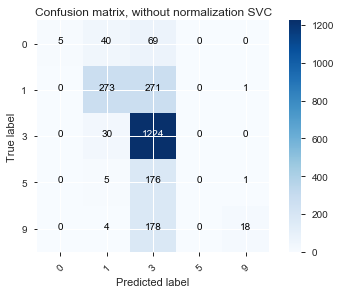

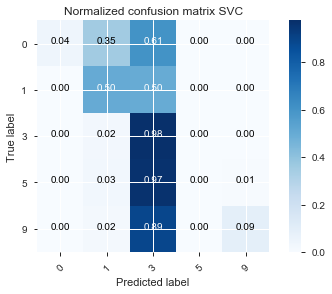

In [45]:
# Compute confusion matrix
cnf_matrix_svc = confusion_matrix(y_test, svc_.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svc, classes=class_names,
                      title='Confusion matrix, without normalization SVC')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svc, classes=class_names, normalize=True,
                      title='Normalized confusion matrix SVC')
plt.show()

Confusion matrix, without normalization
[[ 114    0    0    0    0]
 [   5  533    1    3    3]
 [   1   31 1170   22   30]
 [   1    0    0  175    6]
 [   1    0    0    0  199]]
Normalized confusion matrix
[[1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [9.17e-03 9.78e-01 1.83e-03 5.50e-03 5.50e-03]
 [7.97e-04 2.47e-02 9.33e-01 1.75e-02 2.39e-02]
 [5.49e-03 0.00e+00 0.00e+00 9.62e-01 3.30e-02]
 [5.00e-03 0.00e+00 0.00e+00 0.00e+00 9.95e-01]]


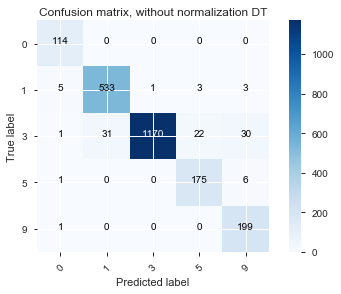

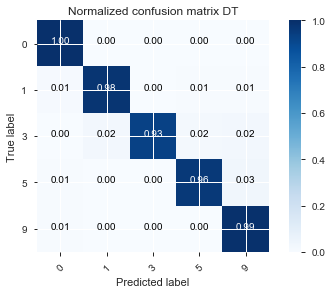

In [46]:
# Compute confusion matrix
cnf_matrix_dtr = confusion_matrix(y_test, dtr_.predict(X_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dtr, classes=class_names,
                      title='Confusion matrix, without normalization DT')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dtr, classes=class_names, normalize=True,
                      title='Normalized confusion matrix DT')
plt.show()